# **INFO ENTREGA**

****Data Science CoderHouse 61750****

****Alumno: Facundo Rodríguez****



# **PRESENTACION**

****Introducción****

Este análisis tiene como objetivo explorar y predecir patrones relacionados con accidentes de tráfico en diversas ubicaciones, con el fin de mejorar la seguridad vial. A través de la identificación de factores que puedan influir en la ocurrencia y gravedad de los accidentes, se buscará desarrollar modelos predictivos que ayuden a las autoridades y responsables de políticas de transporte a tomar decisiones más informadas.

****Descripción del Problema****

Los accidentes de tráfico representan una de las principales causas de mortalidad y lesiones a nivel mundial. La predicción y prevención de estos accidentes es clave para mejorar la seguridad en las carreteras y reducir el impacto social y económico asociado. Factores como la hora del día, el día de la semana, las condiciones climáticas y las características de la zona de los accidentes son elementos fundamentales para entender las circunstancias que contribuyen a los accidentes.

El análisis de datos de accidentes de tráfico nos permitirá descubrir patrones y factores que afectan la ocurrencia de estos eventos. Esto incluye variables como la cantidad de vehículos involucrados, la localización geográfica (latitud), la hora y el día del accidente, entre otros. Estos patrones pueden ser utilizados para predecir comportamientos futuros y mejorar las estrategias de prevención.

****Objetivo****

El objetivo principal de este trabajo es construir un modelo predictivo que sea capaz de anticipar la ocurrencia de accidentes de tráfico basándose en diversas características, como la hora, el día, la ubicación geográfica, y la cantidad de vehículos involucrados. Para lograr este objetivo, se explorará un conjunto de datos sobre accidentes, se realizará un análisis exploratorio para comprender las relaciones entre las variables, y se construirán modelos predictivos para identificar zonas de alto riesgo y períodos críticos para la ocurrencia de accidentes.

****Fuente****

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y están disponibles en el siguiente enlace: [Car Crash Dataset](https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset)

Este conjunto de datos contiene información detallada sobre accidentes de tráfico, incluyendo atributos como la hora, el día, el mes, la cantidad de vehículos involucrados, y las coordenadas geográficas del accidente (latitud y longitud). Este análisis permitirá identificar patrones y factores de riesgo, y construir modelos predictivos para mejorar la seguridad vial.



*IMPORTAR LIBRERIAS Y CARGAR DATOS*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Montaje DataSet**

Exploración de Datos
En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.

In [5]:
# Cargar los datos en un DataFrame de pandas usando la ruta correcta
archivo_path = '/content/drive/MyDrive/Primer Entrega/dframe.csv'

# Cargar el dataset
df = pd.read_csv(archivo_path)

# Ver las primeras filas del DataFrame
print(df.head())

   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


# **Resumen del Conjunto de Datos:**

El conjunto de datos contiene un total de 53,943 filas (registros) y 11 columnas (variables).

Se observa que algunas columnas tienen valores faltantes (non-null count menor que el número total de filas). Las variables con valores faltantes incluyen:

Weekend?: 53875 valores no nulos
Hour: 53718 valores no nulos
Collision Type: 53937 valores no nulos
Primary Factor: 52822 valores no nulos
Reported_Location: 53908 valores no nulos
Latitude: 53913 valores no nulos
Longitude: 53913 valores no nulos
Estos valores faltantes podrían requerir un manejo especial durante el preprocesamiento de datos.

Variables Potencialmente Relevantes:

Algunas variables que podrían ser relevantes para un análisis más profundo o una predicción relacionada con los accidentes son:

Year: Año del accidente
Month: Mes del accidente
Day: Día del accidente
Weekend?: Indica si el accidente ocurrió en fin de semana
Hour: Hora del accidente
Collision Type: Tipo de colisión
Injury Type: Tipo de lesión
Primary Factor: Factor principal del accidente
Reported_Location: Ubicación reportada del accidente
Latitude y Longitude: Coordenadas geográficas del accidente

In [44]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,114.689149,-891.666009
std,3.789760,3.514630,1.909440,531.654039,1757.770996,8345.507972
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-86676.000000
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.553796
50%,2009.000000,7.000000,4.000000,1400.000000,39.164448,-86.531024
75%,2012.000000,10.000000,6.000000,1700.000000,39.173410,-86.508320
max,2015.000000,12.000000,7.000000,2300.000000,39278.000000,86.596363


# **Descripción de las Variables:**



1.   Year:



El valor promedio de la columna "Year" es 2008.97, lo que indica que la mayoría de los accidentes se registran entre 2003 y 2015, con una ligera tendencia hacia los años más cercanos al 2010.
El valor mínimo es 2003 y el máximo es 2015, cubriendo un rango de 13 años.
La desviación estándar es 3.79, lo que refleja una distribución relativamente amplia de los años, aunque la mayoría de los accidentes ocurren en el rango cercano al 2008.

2.   Month:


El valor promedio de la columna "Month" es 6.66, lo que sugiere que los accidentes están distribuidos de manera más o menos uniforme a lo largo del año.
El mes mínimo es 1 (enero) y el máximo es 12 (diciembre).
La desviación estándar es 3.51, lo que indica que algunos meses tienen una mayor concentración de accidentes, pero sin una gran disparidad.

3.   Day:

El valor promedio de la columna "Day" es 4.20, lo que muestra que los accidentes ocurren en distintos días del mes, pero se concentran más hacia los primeros días.
El día mínimo es 1 y el máximo es 7, lo que podría sugerir que los datos son de una semana o que se agrupan por días de la semana (aunque también podría ser un valor atípico o indicación de un formato especial).
La desviación estándar de 1.91 refleja una dispersión moderada de los accidentes a lo largo de los días.

4.   Hour

El valor promedio de la columna "Hour" es 1347.27, lo que parece indicar que la hora está representada en formato de 24 horas, con una media alrededor de las 13:47 (hora local).
El valor mínimo es 0 (medianoche) y el máximo es 2300, lo que podría indicar que la hora está en formato de 4 dígitos (por ejemplo, 2300 para las 11:00 PM).
La desviación estándar de 531.65 indica una amplia variabilidad en la hora de los accidentes.

5.   Latitude:

El valor promedio de la columna "Latitude" es 39.14, lo que indica que los accidentes ocurren en ubicaciones geográficas dentro de los Estados Unidos, probablemente en el sur o centro del país, basándose en las coordenadas.
El valor mínimo es 0.00 y el máximo es 39278.00, lo que puede ser un valor atípico, ya que excede la latitud posible para ubicaciones geográficas en la Tierra (que van de -90 a 90 grados).
La desviación estándar de 1757.77 también sugiere que hay valores erróneos o atípicos en la latitud.

6.   Longitude:

El valor promedio de la columna "Longitude" es -86.53, lo que también sugiere que los accidentes están principalmente en áreas dentro de los Estados Unidos.
El valor mínimo es -86676.00 y el máximo es 86.60, con un valor atípico notable (el valor mínimo parece un error o un dato mal registrado).
La desviación estándar de 8345.51 refuerza la idea de que hay valores atípicos en las longitudes, que necesitan ser verificados.


In [45]:
df.head(20)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
5,2015,1,6,Weekday,1800.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BURKS & WALNUT,39.126670,-86.531370
6,2015,1,6,Weekday,1200.0,2-Car,No injury/unknown,DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,SOUTH CURRY PIKE LOT 71,39.150825,-86.584899
7,2015,1,6,Weekday,1400.0,1-Car,Incapacitating,ENGINE FAILURE OR DEFECTIVE,NORTH LOUDEN RD,39.199272,-86.637024
8,2015,1,7,Weekend,1400.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,LIBERTY & W 3RD,39.164610,-86.579130
9,2015,1,7,Weekend,1600.0,1-Car,No injury/unknown,RAN OFF ROAD RIGHT,PATTERSON & W 3RD,39.163440,-86.551280


# **Hipótesis planteadas**

1. **El día de la semana influye en la cantidad de accidentes:**
   - Los accidentes son más frecuentes durante los fines de semana (`Weekend`) en comparación con los días de semana (`Weekday`), lo que podría estar relacionado con el mayor tráfico o comportamiento del conductor.

2. **El tipo de colisión está asociado con la gravedad de las lesiones:**
   - Las colisiones de tipo "1-Car" (un solo vehículo involucrado) tienden a estar asociadas con lesiones más graves (`Incapacitating`), mientras que las colisiones de tipo "2-Car" (dos vehículos involucrados) presentan mayor proporción de accidentes con lesiones leves o sin lesiones.

3. **La hora del día influye en la gravedad del accidente:**
   - Los accidentes ocurren con mayor frecuencia en las horas de la tarde (por ejemplo, entre las 12:00 y 18:00), y aquellos que ocurren en la madrugada o a altas horas de la noche son más propensos a resultar en accidentes graves o de mayor impacto.

4. **La latitud y longitud afectan la frecuencia de los accidentes:**
   - Existen zonas geográficas específicas (indicadas por las coordenadas de latitud y longitud) con mayor concentración de accidentes. Es posible que haya áreas con alta densidad de tráfico o problemas recurrentes en esas ubicaciones.

5. **Los accidentes en áreas con más tráfico tienden a ser más graves:**
   - Las ubicaciones reportadas que se encuentran en zonas de alto tráfico o intersecciones importantes tienen una mayor probabilidad de estar asociadas con accidentes más graves.


# **Días de Semana VS Días Fin De Semana**

<ipython-input-49-19b53354a1f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekend?', data=df, palette='Set2')


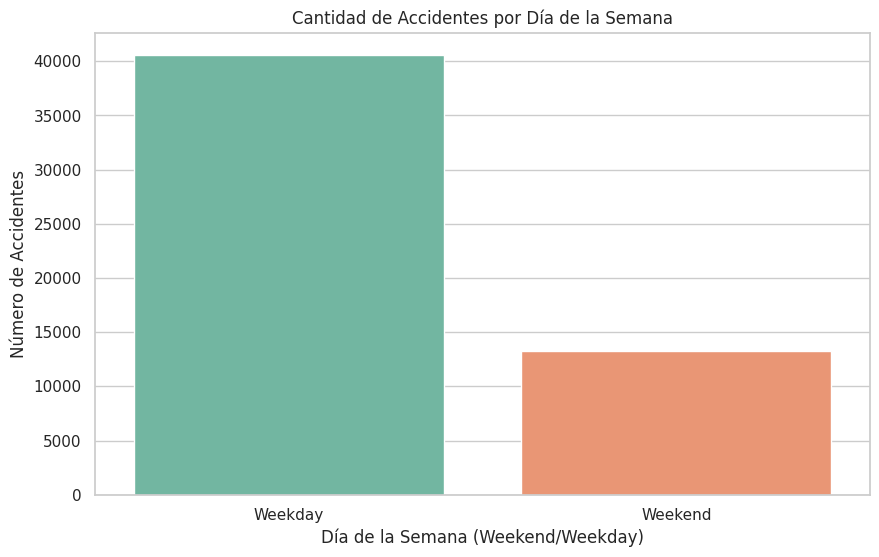

In [49]:
# Establecer un estilo de gráfico más atractivo
sns.set(style="whitegrid")

# 1. Hipótesis: El día de la semana influye en la cantidad de accidentes
plt.figure(figsize=(10,6))
sns.countplot(x='Weekend?', data=df, palette='Set2')
plt.title('Cantidad de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana (Weekend/Weekday)')
plt.ylabel('Número de Accidentes')
plt.show()

Parecería haber una tendencia a haber más accidentes días de semana. Veamoslo más a detalle

Porcentaje de accidentes en fines de semana: 24.60%
Porcentaje de accidentes en días de semana: 75.27%


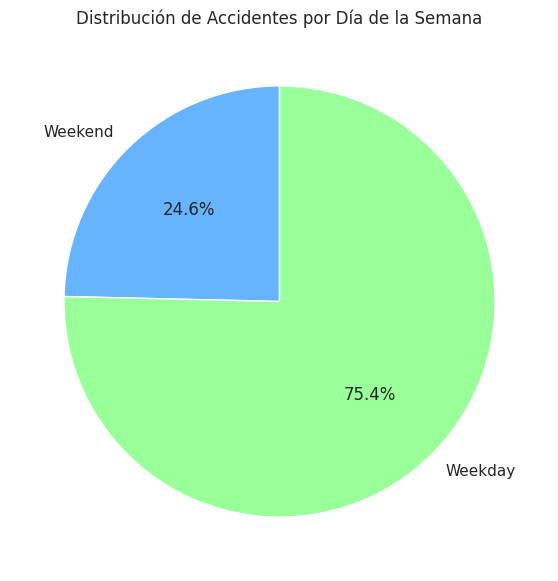

In [50]:
# Calcular los porcentajes de accidentes por tipo de día (Weekend/Weekday)
accidents_weekend = df[df['Weekend?'] == 'Weekend'].shape[0]  # Número de accidentes en fines de semana
accidents_weekday = df[df['Weekend?'] == 'Weekday'].shape[0]  # Número de accidentes en días de semana

total_accidents = df.shape[0]  # Total de accidentes

# Porcentajes
weekend_percentage = (accidents_weekend / total_accidents) * 100
weekday_percentage = (accidents_weekday / total_accidents) * 100

# Mostrar los porcentajes
print(f"Porcentaje de accidentes en fines de semana: {weekend_percentage:.2f}%")
print(f"Porcentaje de accidentes en días de semana: {weekday_percentage:.2f}%")

# Crear un gráfico de torta para visualizar los porcentajes
labels = ['Weekend', 'Weekday']
sizes = [weekend_percentage, weekday_percentage]
colors = ['#66b3ff', '#99ff99']

# Crear un gráfico de torta
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Accidentes por Día de la Semana')
plt.show()


el 75 % de los accidentes apuntaria a fin de semana pero podemos hacer algunas predicciones respectoa  esta variable:

Promedio de accidentes por día de semana: 7738.60
Promedio de accidentes por día del fin de semana: 7625.00


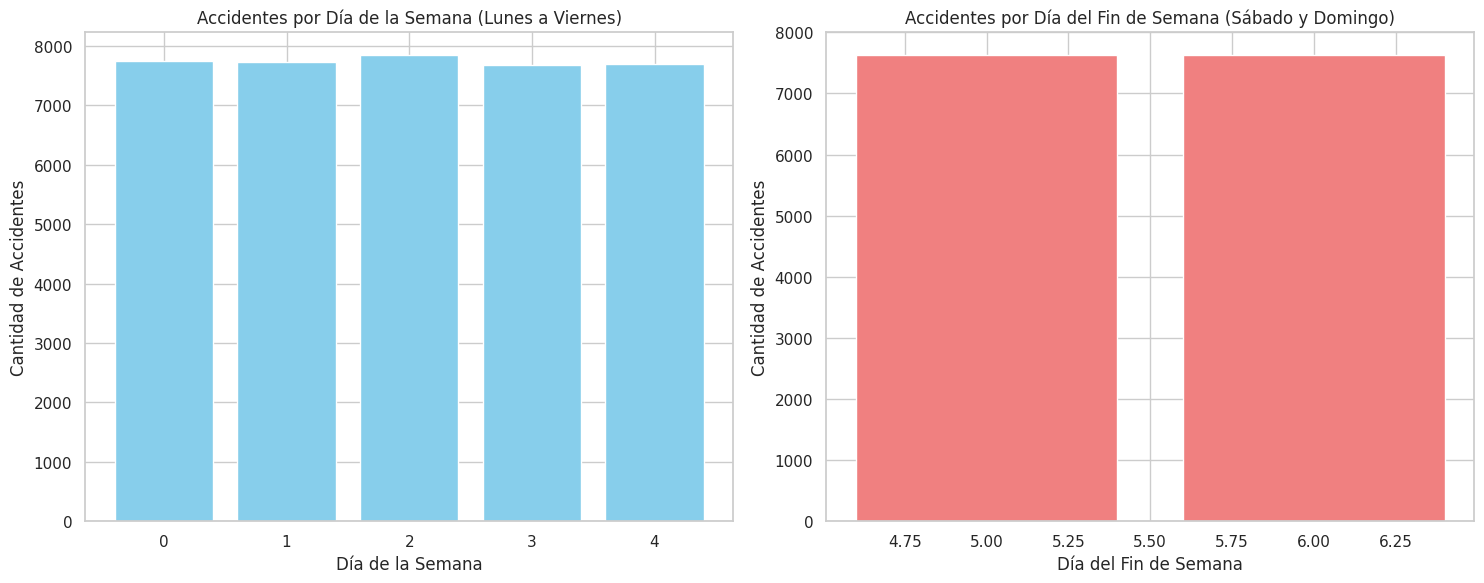

In [51]:

# Agregar una columna con el día de la semana (0=domingo, 1=lunes, ..., 6=sábado)
df['Weekday'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)).dt.weekday

# Filtrar los datos por días de semana (lunes a viernes) y fines de semana (sábado y domingo)
weekdays = df[df['Weekday'] < 5]  # Días de semana (lunes a viernes)
weekend = df[df['Weekday'] >= 5]  # Fines de semana (sábado y domingo)

# Contar los accidentes por día de la semana (lunes a viernes)
accidents_weekdays = weekdays.groupby('Weekday').size()

# Contar los accidentes por día del fin de semana (sábado y domingo)
accidents_weekend = weekend.groupby('Weekday').size()

# Número de días de semana (lunes a viernes) y fines de semana (sábado y domingo)
num_weekdays = 5  # Lunes a viernes
num_weekend = 2   # Sábado y domingo

# Calcular los accidentes promedio por día de semana y por día del fin de semana
avg_accidents_weekday = accidents_weekdays.sum() / num_weekdays
avg_accidents_weekend = accidents_weekend.sum() / num_weekend

# Mostrar los resultados
print(f"Promedio de accidentes por día de semana: {avg_accidents_weekday:.2f}")
print(f"Promedio de accidentes por día del fin de semana: {avg_accidents_weekend:.2f}")

# Crear una gráfica para visualizar
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de accidentes por día de semana
axes[0].bar(accidents_weekdays.index, accidents_weekdays.values, color='skyblue')
axes[0].set_title('Accidentes por Día de la Semana (Lunes a Viernes)')
axes[0].set_xlabel('Día de la Semana')
axes[0].set_ylabel('Cantidad de Accidentes')

# Gráfico de accidentes por día del fin de semana
axes[1].bar(accidents_weekend.index, accidents_weekend.values, color='lightcoral')
axes[1].set_title('Accidentes por Día del Fin de Semana (Sábado y Domingo)')
axes[1].set_xlabel('Día del Fin de Semana')
axes[1].set_ylabel('Cantidad de Accidentes')

plt.tight_layout()
plt.show()


Si distribuimos los accidentes de la semana entre (/) los 5 días de la semana [Lun, Mart, Mier, Jue, Vier] y lo enfrentamos a los accidentes del finde entre  (/) los días del finde [Sab, Dom]. Nos enfrenteamos a que los accidentes por día estan aproximadamente en un promedio de 7000 y 8000 accidentes diarios, con leve mayoria en la semana. Para poder seguir ammpliando precisariamos el detalle de día a día.

# **El tipo de colisión está asociado con la gravedad de las lesiones**




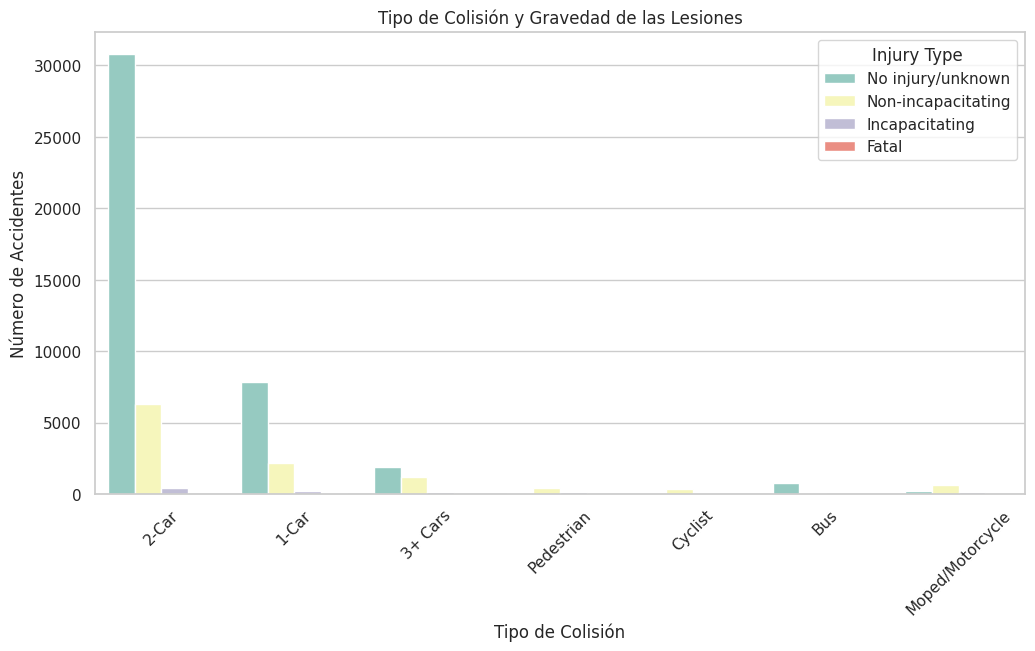

In [52]:
# 2. Hipótesis: El tipo de colisión está asociado con la gravedad de las lesiones
plt.figure(figsize=(12,6))
sns.countplot(x='Collision Type', hue='Injury Type', data=df, palette='Set3')
plt.title('Tipo de Colisión y Gravedad de las Lesiones')
plt.xlabel('Tipo de Colisión')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()

Visualmente, parece haber una relación, ya que las colisiones con múltiples vehículos tienden a tener más lesiones no incapacitantes y menos fatales, mientras que colisiones con peatones o ciclistas podrían mostrar proporciones distintas. Pero para una conclusión sólida, se necesitaría un análisis de significancia estadística


*PRORCEDEMOS A IMPORTAR STATS PARA REALIZAR UN PRUEBA QUE CONFIRME O NIEGUE NUESTRA HIPOTESIS*

In [54]:
import scipy.stats as stats

# Crear una tabla de contingencia que cruce 'Collision Type' y 'Injury Type'
contingency_table = pd.crosstab(df['Collision Type'], df['Injury Type'])

# Mostrar la tabla de contingencia
print(contingency_table)

# Realizar la prueba de chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Mostrar los resultados de la prueba de chi-cuadrado
print(f'Chi-cuadrado: {chi2_stat}')
print(f'Valor p: {p_val}')
print(f'Degrees of freedom (dof): {dof}')
print(f'Esperados: \n{expected}')

# Interpretación del valor p
if p_val < 0.05:
    print("Existe una relación significativa entre el tipo de colisión y la gravedad de las lesiones.")
else:
    print("No existe una relación significativa entre el tipo de colisión y la gravedad de las lesiones.")

Injury Type       Fatal  Incapacitating  No injury/unknown  Non-incapacitating
Collision Type                                                                
1-Car                49             205               7854                2137
2-Car                31             451              30807                6317
3+ Cars               5             116               1855                1176
Bus                   1               9                758                  82
Cyclist               0              50                 61                 357
Moped/Motorcycle     21             154                213                 619
Pedestrian            8             104                 49                 448
Chi-cuadrado: 6558.98764149363
Valor p: 0.0
Degrees of freedom (dof): 18
Esperados: 
[[2.18435397e+01 2.06848824e+02 7.90109322e+03 2.11521442e+03]
 [8.01803956e+01 7.59273486e+02 2.90022949e+04 7.76425118e+03]
 [6.72043310e+00 6.36395795e+01 2.43086831e+03 6.50771678e+02]
 [1.81229953e+0

# **La hora del día influye en la gravedad del accidente:**


<ipython-input-55-4d8ff065d765>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Injury Type', data=df, palette='Set2')


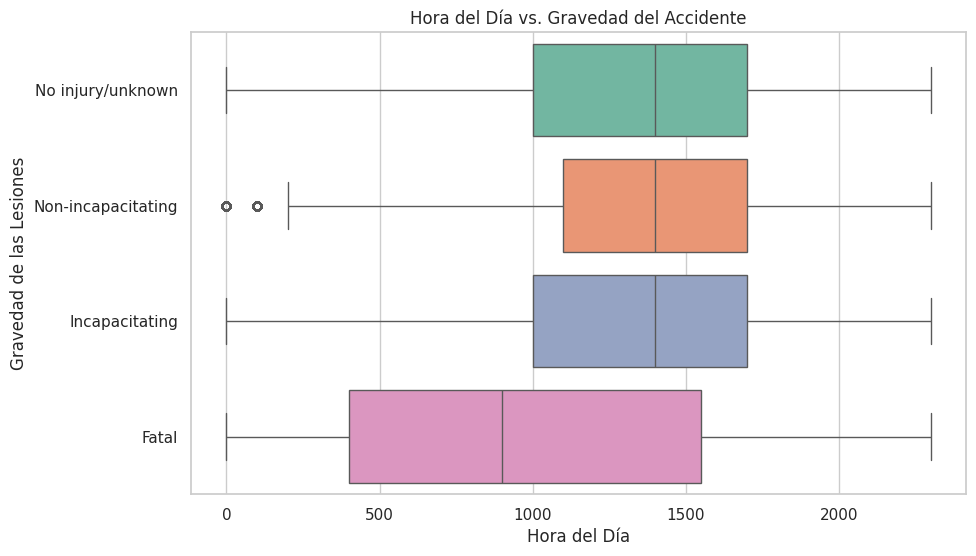

In [55]:
# 3. Hipótesis: La hora del día influye en la gravedad del accidente
plt.figure(figsize=(10,6))
sns.boxplot(x='Hour', y='Injury Type', data=df, palette='Set2')
plt.title('Hora del Día vs. Gravedad del Accidente')
plt.xlabel('Hora del Día')
plt.ylabel('Gravedad de las Lesiones')
plt.show()

Visualmente parece haber una correlacion entre franja horaria y tipo de accidente. Procederemos a testearlo

Injury Type  Fatal  Incapacitating  No injury/unknown  Non-incapacitating
Hour                                                                     
0.0              9              21                892                 193
100.0            6              18                631                 146
200.0            6              12                572                 126
300.0            5              19                555                 140
400.0            4               8                378                  88
500.0            5              10                393                 106
600.0            8              26                599                 173
700.0           10              41               1531                 449
800.0            1              36               1752                 458
900.0            4              40               1853                 421
1000.0           3              44               1871                 442
1100.0           4              54    

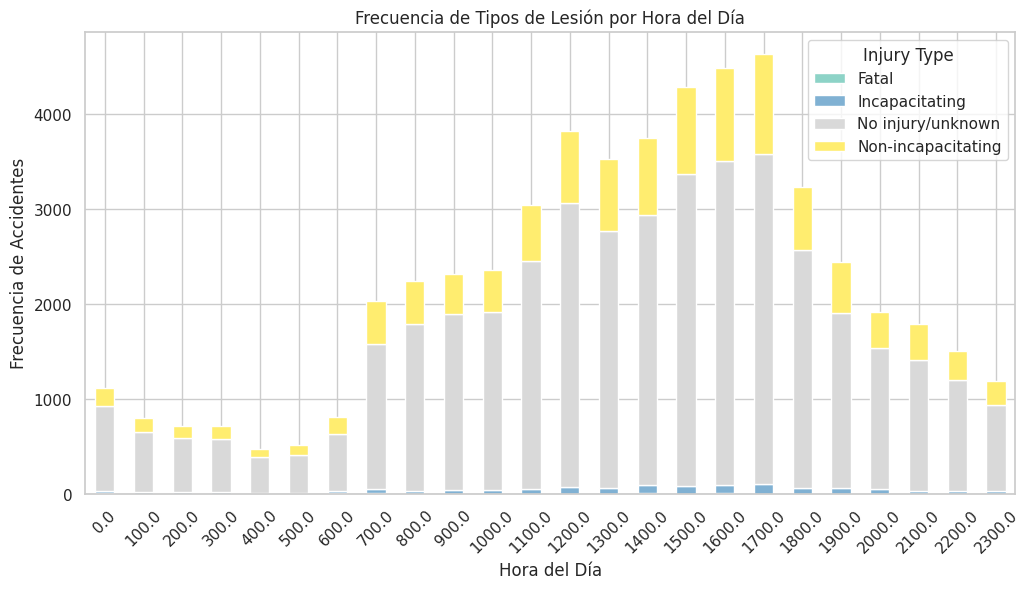

In [59]:
# Agrupar por hora y tipo de lesión
hourly_injury_counts = df.groupby(['Hour', 'Injury Type']).size().unstack(fill_value=0)

# Mostrar la tabla resultante para ver la distribución
print(hourly_injury_counts)

# Graficar las frecuencias por hora para cada tipo de lesión
hourly_injury_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Frecuencia de Tipos de Lesión por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia de Accidentes')
plt.xticks(rotation=45)
plt.show()



In [61]:
import scipy.stats as stats

# Tomamos solo las columnas relevantes (lesión) para aplicar la ANOVA
injury_types = hourly_injury_counts.columns

# Aplicar la prueba ANOVA para comparar la frecuencia de lesiones entre las horas del día
anova_result = stats.f_oneway(*[hourly_injury_counts[type] for type in injury_types])

# Mostrar los resultados de la prueba ANOVA
print(f'Valor p: {anova_result.pvalue}')
print(f'F-statistic: {anova_result.statistic}')

# Interpretar el valor p
if anova_result.pvalue < 0.05:
    print("Hay una diferencia significativa en la gravedad de las lesiones según la hora del día.")
else:
    print("No hay diferencia significativa en la gravedad de las lesiones según la hora del día.")


Valor p: 1.7622179648805227e-20
F-statistic: 55.107622474780264
Hay una diferencia significativa en la gravedad de las lesiones según la hora del día.


Podemos deducir que hay una diferencia de las gravedades de las lesiones segun lahora del día, posiblemente influenciado por algun horario pico en carreteras o calles, quizas asociado a salida de horarios de trabajo o cansancio en los conductores por la hora del día. Ya que aumenta no solo tipo de accidentes mas graves sino cantidad general de accidentes.

# **La cantidad de accidentes varía según la gravedad de las lesiones:**

<ipython-input-62-23e6c8d96380>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Injury Type', data=df, palette='Set1')


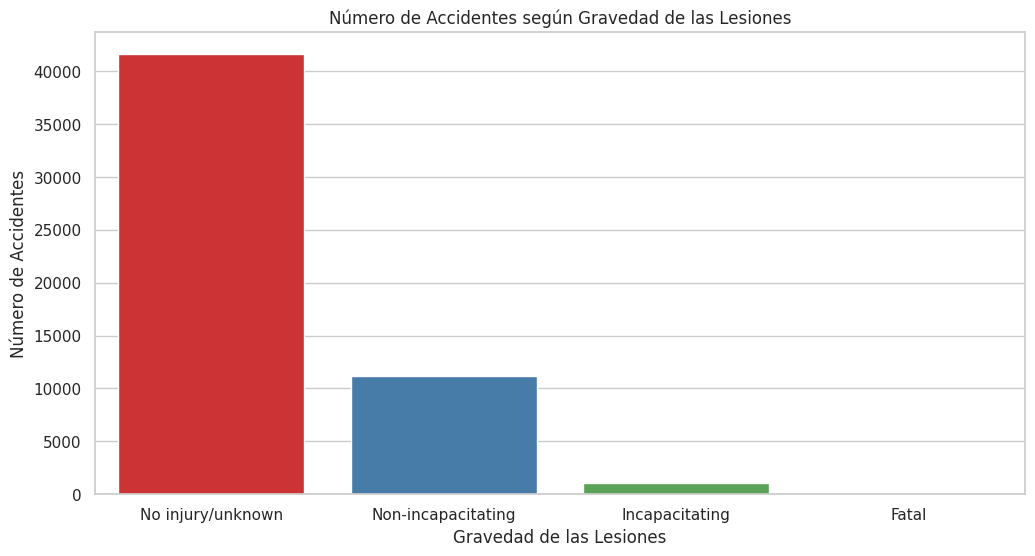

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='Injury Type', data=df, palette='Set1')
plt.title('Número de Accidentes según Gravedad de las Lesiones')
plt.xlabel('Gravedad de las Lesiones')
plt.ylabel('Número de Accidentes')
plt.show()


La gravedad de los accidentes parece ser inversamente proporcional a la cantidad de los mismos. Siendo loos No injury o unknows los mas frecuentes, y disminuyendo segun aumenta la gravedad

# **La ubicación del accidente tiene influencia en la cantidad de accidentes:**

<ipython-input-66-7fd3ef1002bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reported_Location', data=filtered_df, palette='Set2')


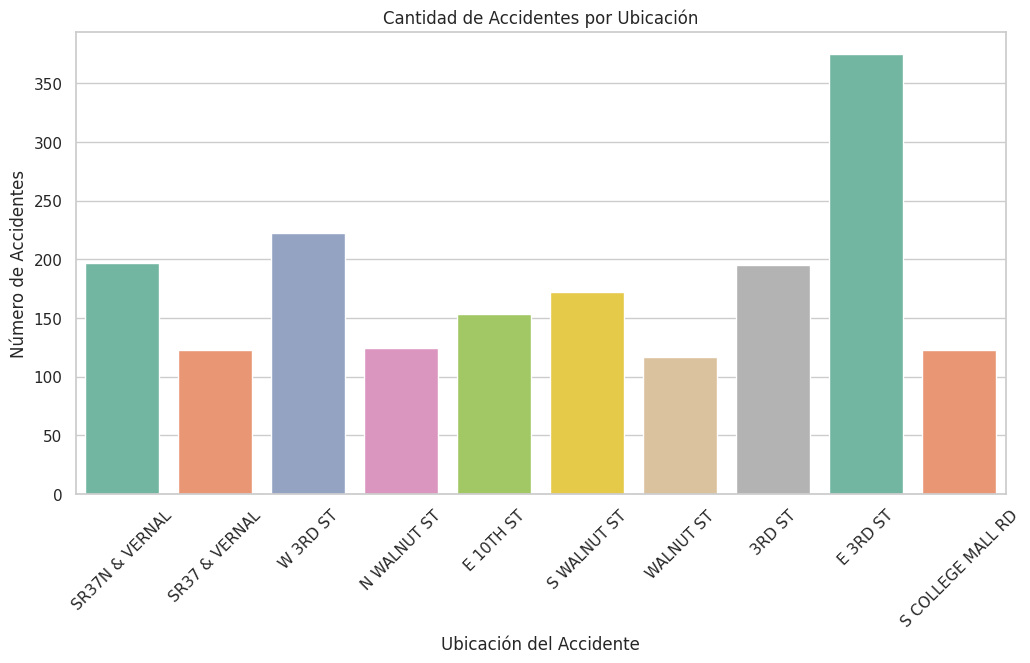

In [66]:
# Filtrar solo algunas ubicaciones más frecuentes para evitar un gráfico demasiado grande
top_locations = df['Reported_Location'].value_counts().head(10).index
filtered_df = df[df['Reported_Location'].isin(top_locations)]

plt.figure(figsize=(12,6))
sns.countplot(x='Reported_Location', data=filtered_df, palette='Set2')
plt.title('Cantidad de Accidentes por Ubicación')
plt.xlabel('Ubicación del Accidente')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()



In [7]:
# Eliminar filas con valores NaN en las columnas 'Reported_Location' y 'Latitude'
df_cleaned = df.dropna(subset=['Reported_Location', 'Latitude'])

# Verificar si hay NaN en alguna de las columnas
print(df_cleaned.isnull().sum())


Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  218
Collision Type          6
Injury Type             0
Primary Factor       1107
Reported_Location       0
Latitude                0
Longitude               0
dtype: int64


In [8]:
# Agrupar por ubicación y contar la cantidad de accidentes
location_accidents = df_cleaned['Reported_Location'].value_counts()

# Crear una tabla de contingencia entre 'Reported_Location' y los accidentes
contingency_table = pd.crosstab(df_cleaned['Reported_Location'], df_cleaned['Reported_Location'])

# Realizar la prueba chi-cuadrado
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print(f'Valor p de la prueba chi-cuadrado: {p}')
if p < 0.05:
    print("La hipótesis es confirmada: existe una relación significativa entre la ubicación y el número de accidentes.")
else:
    print("La hipótesis no es confirmada: no existe una relación significativa.")


Valor p de la prueba chi-cuadrado: 0.0
La hipótesis es confirmada: existe una relación significativa entre la ubicación y el número de accidentes.


Segun devuelve prueba chi- cuadrado el valor es 0.0 lo cual confirmaria la relación